# LIMPIEZA Y EDA
## Limpieza

In [1]:
library(readr)
library(dplyr)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [24]:
#obtenemos datos 
data<-read.csv("https://archivo.datos.cdmx.gob.mx/casos_nacionales_covid-19.csv")

In [3]:
head(data)

X,fecha_actualizacion,id_registro,origen,sector,entidad_um,sexo,entidad_nac,entidad_res,municipio_res,...,otro_caso,toma_muestra_lab,resultado_lab,toma_muestra_antigeno,resultado_antigeno,clasificacion_final,migrante,pais_nacionalidad,pais_origen,uci
1,2021-,z482b8,USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,NA,NA,...,NO,NO,NO APLICA (CASO SIN MUESTRA),NO,NO APLICA (CASO SIN MUESTRA),CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍNICA EPIDEMIOLÓGICA,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA
2,2021-,z24953,USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,NA,NA,...,SI,SI,NO POSITIVO A SARS-COV-2,NO,NO APLICA (CASO SIN MUESTRA),NEGATIVO A SARS-COV-2,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA
3,2021-,zz8e77,USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,NA,NA,...,NO,NO,NO APLICA (CASO SIN MUESTRA),NO,NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA
4,2021-,z2d0c4,USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,NA,NA,...,NO,SI,NO POSITIVO A SARS-COV-2,NO,NO APLICA (CASO SIN MUESTRA),NEGATIVO A SARS-COV-2,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA
5,2021-,z26b82,USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,NA,NA,...,NO,NO,NO APLICA (CASO SIN MUESTRA),SI,NEGATIVO A SARS-COV-2,NEGATIVO A SARS-COV-2,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA
6,2021-,z1b985,USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,NA,NA,...,SI,SI,NO POSITIVO A SARS-COV-2,NO,NO APLICA (CASO SIN MUESTRA),NEGATIVO A SARS-COV-2,NO ESPECIFICADO,MÉXICO,NO APLICA,NO APLICA


### Missing values

In [10]:
missing_data <-sapply(data, function(x) sum(length(which(is.na(x)))))

In [36]:
options(scipen=999)#quito notación científica
missing_data<-data.frame(missing_data) 
missing_data<-add_rownames(missing_data, var = "variable")

#imprimo solo las variables con nas en porcentaje
missing_data %>% 
filter(missing_data>0)%>%
mutate(missing_data= missing_data/nrow(data))

Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”

variable,missing_data
sector,0.00001210931
entidad_res,0.85432897914
municipio_res,0.85432931551
fecha_def,0.97958504069
pais_origen,0.00105721046


Lo primero que notamos es que las variables entidad_res y municipio_res cuentan con una alta proporción de valroes faltantes. De igual manera, la fecha de defunción que probablemente será menos problemática pues podenmos hacer un supuesto bastante creible de que solo tienen valor aquellas personas que han perecido. En cuanto a sector y país de origne, los missing values realmente son muy pocos y podemos prescindir de dichas observaciones.

## Clases

In [56]:
summary(data)

       X           fecha_actualizacion  id_registro     
 Min.   :      1   2021-:2972918       000002 :      1  
 1st Qu.: 743230                       000003 :      1  
 Median :1486460                       000006 :      1  
 Mean   :1486460                       00000a :      1  
 3rd Qu.:2229689                       000014 :      1  
 Max.   :2972918                       00001d :      1  
                                       (Other):2972912  
            origen            sector                   entidad_um     
 FUERA DE USMER:2513137   SSA    :2516868   CIUDAD DE MÉXICO:2952082  
 USMER         : 459781   IMSS   : 321396   MÉXICO          :  15352  
                          PRIVADA:  69533   PUEBLA          :   1411  
                          ISSSTE :  34311   MORELOS         :    938  
                          SEDENA :  11952   HIDALGO         :    445  
                          (Other):  18822   SAN LUIS POTOSÍ :    290  
                          NA's   :     36   (Ot

In [57]:
#notamos que la gran mayoría de las variables son categóricas.
#esto es malo especificamente para las fechas
class(data$fecha_def)
class(data$fecha_sintomas)
class(data$fecha_ingreso)


[1] "factor"

[1] "factor"

[1] "factor"

In [27]:
head(data$fecha_def,10)
head(data$fecha_sintomas,10)
head(data$fecha_ingreso,10)

[1] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
527 Levels: 2020-01-02 2020-01-07 2020-01-08 2020-01-09 ... 2021-06-28

[1] "2020-10-16" "2020-10-15" "2020-04-10" "2020-10-14" "2021-01-10"
 [6] "2020-04-21" "2020-10-01" "2020-05-16" "2020-09-03" "2020-10-06"

[1] "2020-10-16" "2020-10-15" "2020-04-16" "2020-10-15" "2021-01-14"
 [6] "2020-04-26" "2020-10-10" "2020-05-16" "2020-09-08" "2020-10-07"

In [28]:
#notamos que el formato de las fechas es AAAA/MM/DD
data$fecha_def <- as.Date(data$fecha_def)
data$fecha_sintomas <- as.Date(data$fecha_sintomas)
data$fecha_ingreso <- as.Date(data$fecha_ingreso)

## Conclusiones

+ No podemos aprovechar de la mejor manera los datos referentes a la localización geográfica pues son muchísimos missing values y una estrategia de imputación correcta va más allá de los objetivos y alcances del curso.

+ Las variables con categóricas y las observaciones son a nivel individuo.

+ Convertimos las variables de fecha al formato correcto



## EDA

In [36]:
#Podemos hacer una estiamcion y calculo de integral con las fechas

sintomas<-data%>% 
group_by(fecha_sintomas)%>% 
summarise(cantidad=n())%>%
  mutate(cum = cumsum(cantidad))

ingreso<-data%>% 
group_by(fecha_ingreso)%>% 
summarise(cantidad=n())%>%
  mutate(cum = cumsum(cantidad))

muerte<-data%>% 
group_by(fecha_def)%>% 
summarise(cantidad=n())%>%
  mutate(cum = cumsum(cantidad))


Warning message:
“Removed 1 rows containing missing values (position_stack).”

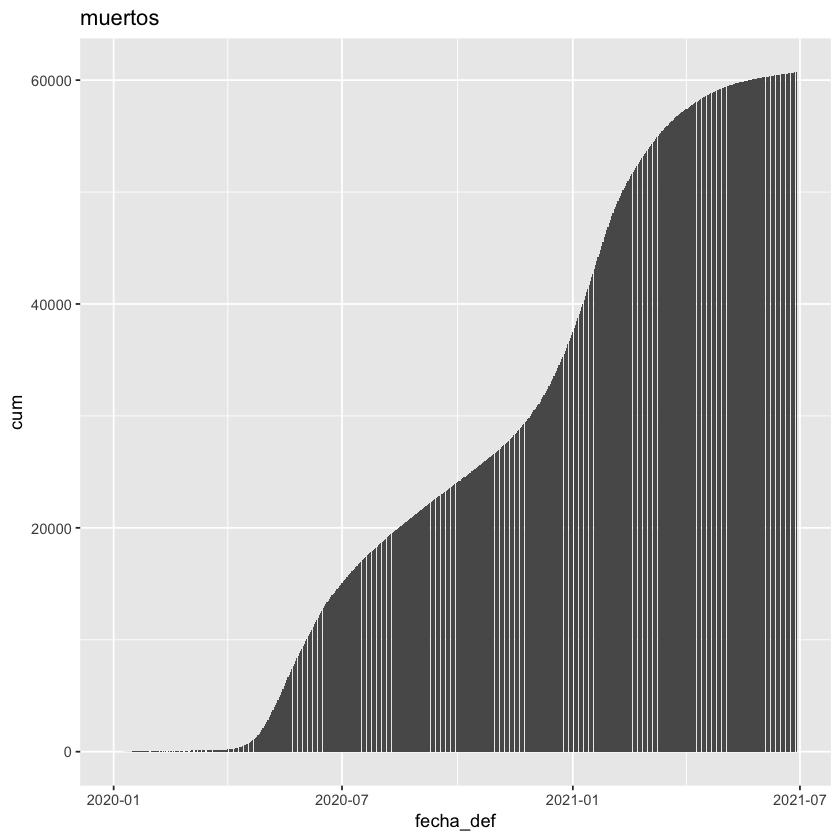

In [39]:
library(ggplot2)
ggplot(data=muerte, aes(x=fecha_def, y=cum)) +
  geom_bar(stat="identity")+ggtitle("muertos")

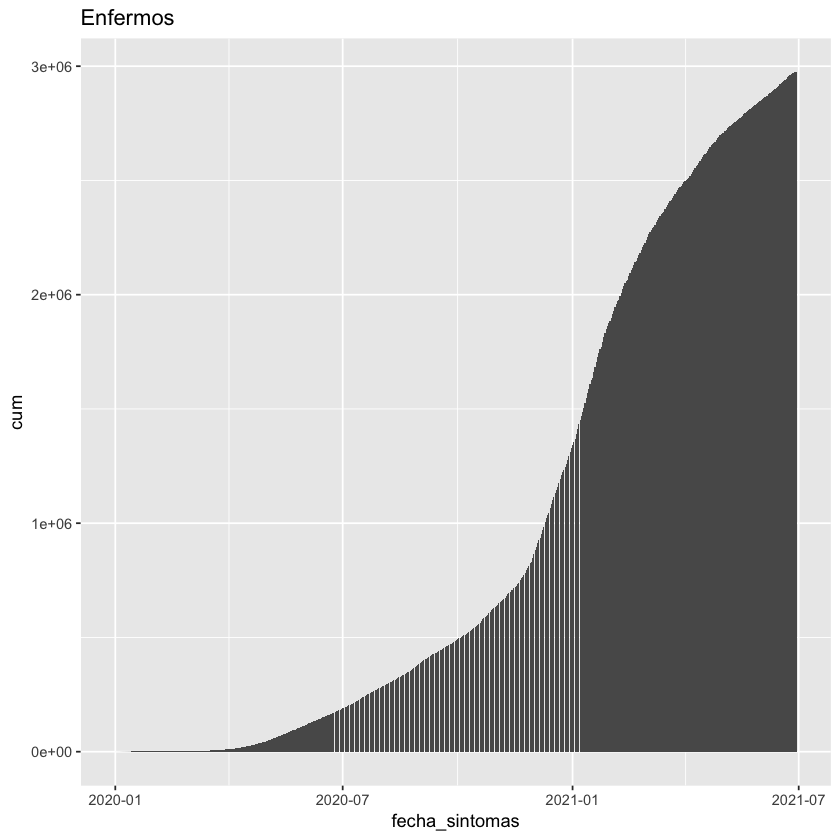

In [40]:
ggplot(data=sintomas, aes(x=fecha_sintomas, y=cum)) +
  geom_bar(stat="identity")+ggtitle("Enfermos")

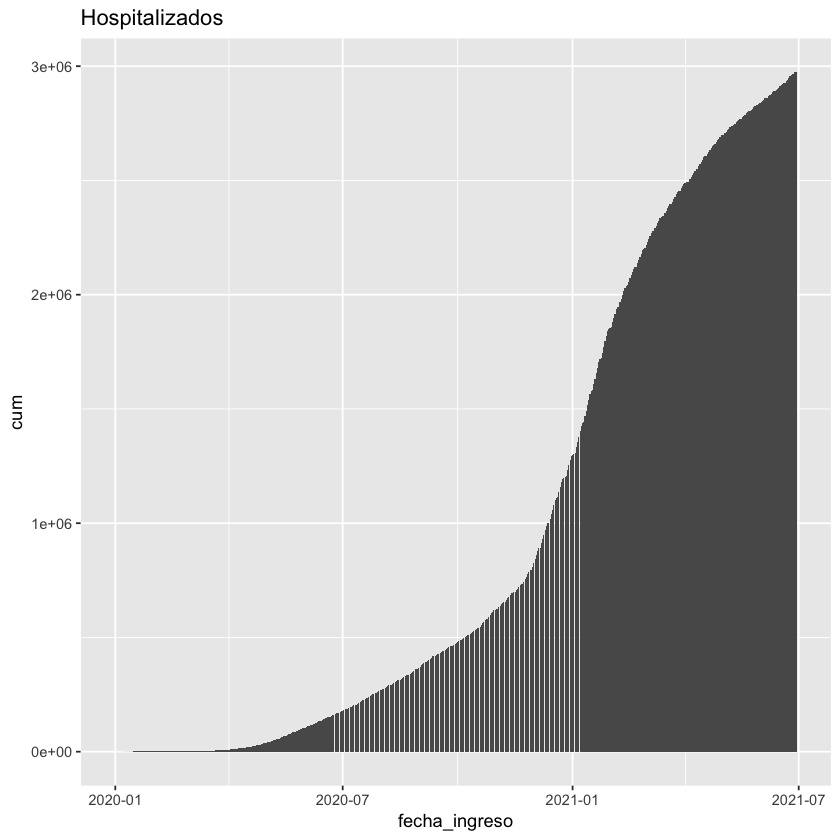

In [41]:
ggplot(data=ingreso, aes(x=fecha_ingreso, y=cum)) +
  geom_bar(stat="identity")+ggtitle("Hospitalizados")

## Feature Engieneering


Creamos las variables relacionadas con el tiempo entre presentar sintomas, ser hospitalizado y perecer.

In [55]:
##time to hospital
data<-data %>% mutate(tiempo_enf_to_hosp=fecha_ingreso-fecha_sintomas)
data$tiempo_enf_to_hosp<-as.numeric(data$tiempo_enf_to_hosp)

##time to hospital and death
data<-data %>% mutate(tiempo_to_death=fecha_def-fecha_ingreso)
data$tiempo_to_death<-as.numeric(data$tiempo_to_death)


##time from infection to death
data<-data %>% mutate(tiempo_inf_death=fecha_def-fecha_sintomas)
data$tiempo_inf_death<-as.numeric(data$tiempo_inf_death)

In [56]:
summary(data$tiempo_enf_to_hosp)
summary(data$tiempo_to_death)
summary(data$tiempo_inf_death)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    1.00    2.51    4.00  265.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -87.0     2.0     6.0     8.9    12.0   309.0 2912226 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -41.0     7.0    12.0    14.4    19.0   309.0 2912226 